In [1]:
## original code from https://biapol.github.io/Image-data-science-with-Python-and-Napari-EPFL2022/day2d_image_segmentation/12_Segmentation_3D.html
## env setting to see https://github.com/clEsperanto/pyclesperanto_prototype/tree/master

In [2]:
from skimage.io import imread
from skimage.io import imsave
from skimage import filters
from skimage import morphology
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [3]:
import napari
from napari.utils import nbscreenshot

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from skimage import measure

In [5]:
cle.available_device_names()

['Oclgrind Simulator']

In [9]:
# For 3D processing, powerful graphics
# processing units might be necessary
cle.select_device('TX')

<Oclgrind Simulator on Platform: Oclgrind (2 refs)>

In [10]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    plt.show()


In [11]:
############################################################
###
### pooling normalized signals from all channels 
###
############################################################

In [12]:
def make_composite_C5(fileName, imageDir, outDir):
    """
    this function combine the C1-C4 channel to make C5 
    """
    #print(' image name -- ', fileName)
    
    C1 = imread(os.path.join(ImageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
    C2 = imread(os.path.join(ImageDir, str(fileName + "_C2.tif"))) # Pax6-KO genotype Scarlet, nuclei
    C3 = imread(os.path.join(ImageDir, str(fileName + "_C3.tif"))) # WT genotype GFP, whole cell 
    C4 = imread(os.path.join(ImageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
    
    C1 = C1 / np.quantile(C1, 0.99)
    C2 = C2 / np.quantile(C2, 0.99)
    C3 = C3 / np.quantile(C3, 0.99)
    C4 = C4 / np.quantile(C4, 0.99)
    
    #C5 = C2 + C3 + C1 + C4
    C5 = C2 + C3
    
    imsave(os.path.join(outDir, str(fileName + "_C5.tif")),  C5)
    

In [13]:
import os
os.getcwd()

'/groups/tanaka/People/current/jiwang/projects/RA_competence/scripts'

In [14]:
## read image from 4 different channels
#ImageDir = "../images_data/d3-4-6_10x_PKO-FKO_chim_fulldataset/d3-4-6_stain-FA2-Sx1"
#ImageDir = "../images_data/d3-4-6_10x_TetOnF_TetOnP_chim_fulldataset/d3-4-6_stain-FA2-Px6"
ImageDir = "../images_data/d4_10x_Pax6KO_WTchim/test_jetraw_compression"
ImageDir = "../images_data/d4_10x_Pax6KO_WTchim"

outDir = ImageDir

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [15]:
for nm in os.listdir(ImageDir):
    if "_C1.tif" in nm:
        #print(nm)
        newName = nm.replace('_C1.tif','')
        #files += [nm]
        print(newName)
        make_composite_C5(newName, ImageDir, outDir)
        

241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_94_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_93_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_91_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_90_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_89_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_87_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_86_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01_isotropic


In [10]:
fileName = "241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic_"
str(fileName + "C1.tif")

'241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic_C1.tif'

In [116]:
C1 = imread(os.path.join(ImageDir, str(fileName + "C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(ImageDir, str(fileName + "C2.tif"))) # Pax6-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(ImageDir, str(fileName + "C3.tif"))) # WT genotype GFP, whole cell 
C4 = imread(os.path.join(ImageDir, str(fileName + "C4.tif"))) # Pax6, nuclei

In [12]:
# dimension of images 
print('pixels (z, y, x) = ', C1.shape)
print('pixels (z, y, x) = ', C2.shape) 
print('pixels (z, y, x) = ', C3.shape)
print('pixels (z, y, x) = ', C4.shape) 

pixels (z, y, x) =  (89, 499, 499)
pixels (z, y, x) =  (89, 499, 499)
pixels (z, y, x) =  (89, 499, 499)
pixels (z, y, x) =  (89, 499, 499)


In [13]:
np.max(C3)
np.quantile(C3, 0.99)
np.quantile(C2, 0.99)

1272.0

In [14]:
C1 = C1 / np.quantile(C1, 0.99)
C2 = C2 / np.quantile(C2, 0.99)
C3 = C3 / np.quantile(C3, 0.99)
C4 = C4 / np.quantile(C4, 0.99)

In [15]:
#np.quantile(C1, 0.5)
np.max(C3)
np.max(C2)
np.max(C1)
np.max(C4)

5.391304347826087

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


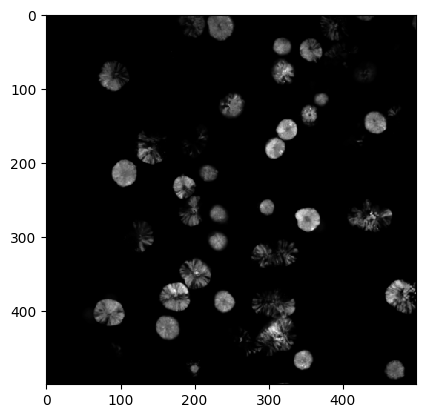

In [16]:
## visualize the 3D images https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/inspecting_3d_images.html
another_slice = cle.create_2d_xy(C3)
cle.copy_slice(C3, another_slice, slice_index = 40)
# show result
cle.imshow(another_slice)

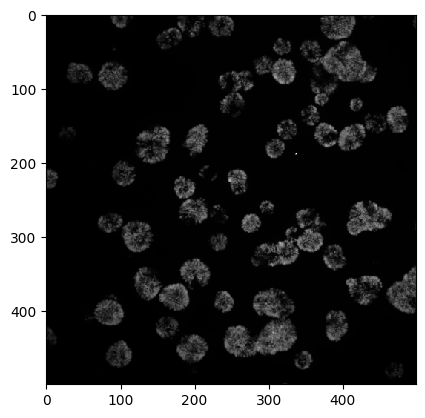

In [17]:
#If you pass an image stack to cle.imshow it will make the maximum intensity projection along Z for you:
#cle.imshow(C1) 
projection_z = cle.maximum_z_projection(C1)
cle.imshow(projection_z)

In [18]:
## suposed to work https://pypi.org/project/stackview/
import stackview
stackview.slice(C1, continuous_update=True)

In [19]:
#C5 = C2 + C3
#np.max(C5)
#projection_z = cle.maximum_z_projection(C5)
#cle.imshow(projection_z)
#imsave("../images_data/test/test_merging_genotypes_C5.tif", C5)

In [20]:
C5 = C2 + C3 + C1 + C4

In [21]:
C5.shape

(89, 499, 499)

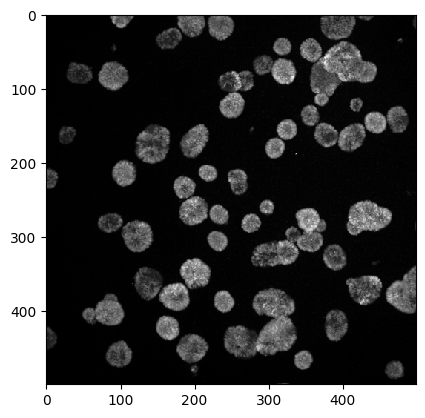

In [22]:
projection_z = cle.maximum_z_projection(C5)
cle.imshow(projection_z)

In [ ]:
############################################################
###
### test 3D organoid segmentation, but failed 
###
############################################################

In [23]:
edges = filters.scharr(C5)
#projection_z = cle.maximum_z_projection(edges)
#cle.imshow(projection_z)

In [24]:
#imsave("../images_data/test/test_mergeing_allchannels_C5.tif", C5)

In [25]:
# background intensity appears to increase, potentially a result if more scattering deep in the sample. We can compensate for that by using a background subtraction technique:
# backgrund_subtracted = cle.top_hat_box(C5, radius_x=5, radius_y=5, radius_z=5)

In [26]:
#show(backgrund_subtracted)

In [27]:
## gaussian filtering to blur the image
denoised = filters.gaussian(C5, sigma = 3)

In [28]:
#projection_z = cle.maximum_z_projection(denoised)
#cle.imshow(projection_z)

In [29]:
#C5_closed = morphology.area_closing(C5_gaussian_blurz)

In [30]:
#segmented = cle.voronoi_otsu_labeling(C5_gaussian_blur, spot_sigma=3, outline_sigma=1)

In [31]:
li_thresholded = denoised > filters.threshold_li(denoised)

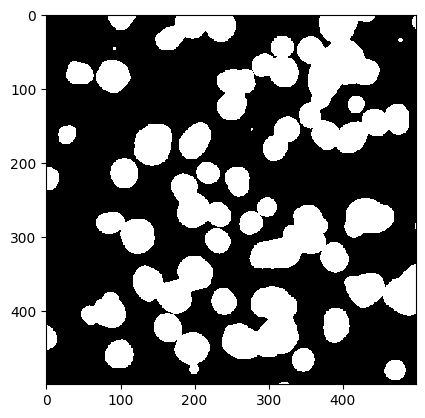

In [32]:
projection_z = cle.maximum_z_projection(li_thresholded)
cle.imshow(projection_z)

In [33]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari_simpleitk_image_processing as nsitk

In [36]:
#binary = nsbatwm.threshold_otsu(nuclei).astype(bool)
#binary

In [42]:
split_objects = nsbatwm.split_touching_objects(li_thresholded, sigma=3)

In [43]:
split_objects.shape

(89, 499, 499)

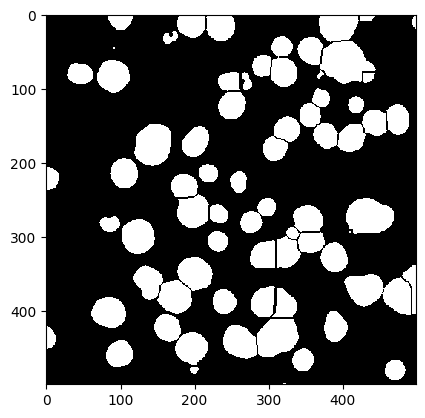

In [44]:
another_slice = cle.create_2d_xy(split_objects)
cle.copy_slice(split_objects, another_slice, slice_index = 40)
# show result
cle.imshow(another_slice)

In [45]:
from skimage import morphology

In [46]:
width = 20
remove_holes = morphology.remove_small_holes(
    split_objects, width ** 3
)

In [47]:
width = 20
remove_objects = morphology.remove_small_objects(
    remove_holes, width ** 3
)

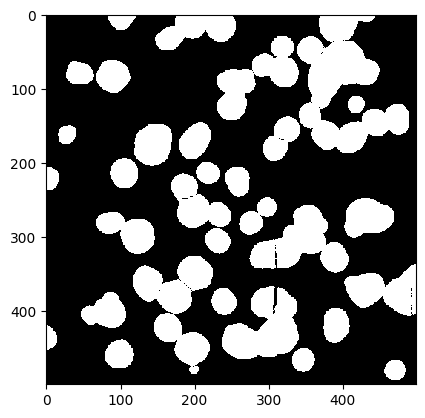

In [48]:
#projection_z = cle.maximum_z_projection(remove_objects)
#cle.imshow(projection_z)

In [57]:
from skimage import measure
labels = measure.label(split_objects)

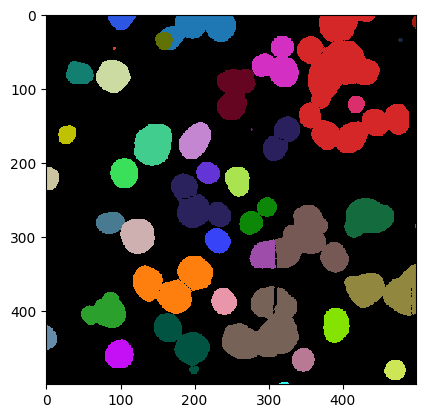

In [58]:
projection_z = cle.maximum_z_projection(labels)
cle.imshow(projection_z, labels=True)

In [51]:
from scipy import ndimage as ndi
transformed = ndi.distance_transform_edt(remove_objects)

In [55]:
from skimage.feature import peak_local_max

#maxima = morphology.local_maxima(transformed)
maxima = peak_local_max(transformed, min_distance=1, labels=remove_objects)
maxima

array([[ 34, 272, 430],
       [ 35, 271, 432],
       [ 35, 272, 435],
       ...,
       [ 47,  66, 368],
       [ 57, 293, 374],
       [ 68, 293, 362]])

In [56]:
from skimage import segmentation

marker_locations = maxima
markers = np.zeros(remove_objects.shape, dtype=np.uint32)
marker_indices = tuple(np.round(marker_locations).astype(int).T)
markers[marker_indices] = np.arange(len(marker_locations)) + 1
markers_big = morphology.dilation(markers, morphology.ball(5))

In [59]:
segmented = segmentation.watershed(
    edges,
    markers_big,
    mask=remove_objects,
)

In [64]:
labels_seg = measure.label(segmented)

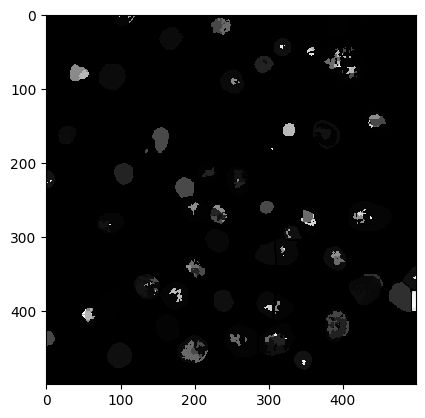

In [66]:
another_slice = cle.create_2d_xy(labels_seg)
cle.copy_slice(labels_seg, another_slice, slice_index = 20)
# show result
cle.imshow(another_slice)

In [ ]:
############################################################
###
### Pax6 KO 
### counting the voxels based on the masked and cyst-level background 
###
############################################################

In [113]:
CPoutDir = "../images_data/CPouts2"

In [114]:
ImageDir = "../images_data/d4_10x_Pax6KO_WTchim"
outDir = "../images_data/test_C5_onlyMask"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [115]:
fileName = '241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic'

In [116]:
mask = imread(os.path.join(CPoutDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
#C1 = imread(os.path.join(CPoutDir, str(fileName + "_FoxA2mask.tiff"))) # FoxA2, nuclei
#C2 = imread(os.path.join(CPoutDir, str(fileName + "_P6KOSCmask.tiff"))) # Pax6-KO genotype Scarlet, nuclei
#C3 = imread(os.path.join(CPoutDir, str(fileName + "_WTGFPmask.tiff"))) # WT genotype GFP, whole cell 
#C4 = imread(os.path.join(CPoutDir, str(fileName + "_Pax6mask.tiff"))) # Pax6, nuclei
C1 = imread(os.path.join(ImageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(ImageDir, str(fileName + "_C2.tif"))) # Pax6-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(ImageDir, str(fileName + "_C3.tif"))) # WT genotype GFP, whole cell 
C4 = imread(os.path.join(ImageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei

In [117]:
C1 = C1 / np.quantile(C1, 0.99)
C2 = C2 / np.quantile(C2, 0.99)
C3 = C3 / np.quantile(C3, 0.99)
C4 = C4 / np.quantile(C4, 0.99)

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


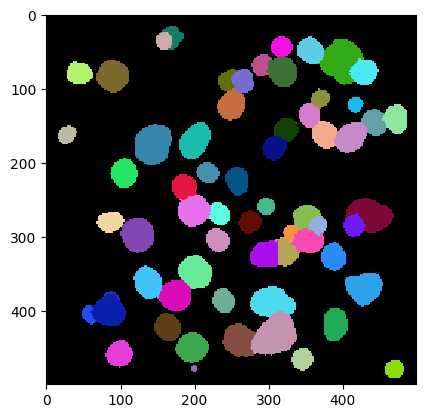

In [43]:
projection_z = cle.maximum_z_projection(mask)
cle.imshow(projection_z, labels=True)

In [118]:
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank

labels_mask, nb_cyst = measure.label(mask, return_num = True)

In [23]:
np.max(mask)
np.min(mask)
np.unique(mask)
np.unique(C3)
np.unique(C3)

array([6.34075201e-05, 1.26815040e-04, 1.90222560e-04, ...,
       3.28374865e+00, 3.31177478e+00, 3.32547080e+00])

In [24]:
nb_cyst

64

In [120]:
#local_otsu = rank.otsu(img, footprint)
#global_otsu = img >= threshold_global_otsu
cutoff_wt = threshold_otsu(C3)
cutoff_ko = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6)

0.5001735037806734 0.4327891607704403 0.44733443161801717 0.6657661769701086


In [91]:
cyst_index = np.where(labels_mask == 4)
print(cyst_index[0].size)
genotype_wt = C3[cyst_index]
genotype_ko = C2[cyst_index]
pax6 = C4[cyst_index]
foxa2 = C1[cyst_index]

19348


In [98]:
cutoff_wt = threshold_otsu(genotype_wt)
print(cutoff_wt)
cutoff_ko = threshold_otsu(genotype_ko)
print(cutoff_ko)
cutoff_foxa2 = threshold_otsu(foxa2)
print(cutoff_foxa2)
cutoff_pax6 = threshold_otsu(pax6)
print(cutoff_pax6, cutoff_wt)

0.7223228651480565
0.01966330090408805
0.2925899859503439
1.1475432022758154 0.7223228651480565


In [93]:
sels = np.where((genotype_wt > cutoff_wt) | (genotype_ko > cutoff_ko))

genotype_wt_sels = genotype_wt[sels]
genotype_ko_sels = genotype_ko[sels]
pax6_sels = pax6[sels]
foxa2_sels = foxa2[sels]
sels[0].size
index_wt = np.where(genotype_wt_sels > genotype_ko_sels) # compare GFP with Scarlet in the scaled intensities # this worth checking how many are double positive (to do)
print(index_wt[0].size/sels[0].size)

foxa2_wt = foxa2_sels[index_wt]
pax6_wt = pax6_sels[index_wt]

index_foxa2 = np.where((foxa2_wt > cutoff_foxa2) & (pax6_wt < cutoff_pax6))
index_pax6 = np.where((foxa2_wt < cutoff_foxa2) & (pax6_wt > cutoff_pax6)) ##
index_double = np.where((foxa2_wt > cutoff_foxa2) & (pax6_wt > cutoff_pax6))

print(index_foxa2[0].size/(index_foxa2[0].size + index_pax6[0].size + index_double[0].size))


0.988474684047373
0.1169076052796983


In [9]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank

from skimage import measure
data = {"image": [], "cyst_index": [], "cyst_size": [],  "pct_genotype": [], "pct_wt": [], "pct_foxa2": [], "pct_pax6": [],  
        "cutoff_wt": [],  "cutoff_ko": [],  "cutoff_foxa2": [],  "cutoff_pax6": []}
df = pd.DataFrame(data)
df

Empty DataFrame
Columns: [image, cyst_index, cyst_size, pct_genotype, pct_wt, pct_foxa2, pct_pax6, cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6]
Index: []

In [134]:
CPoutDir = "../images_data/CPouts2"
for nm in os.listdir(CPoutDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(CPoutDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        #C1 = imread(os.path.join(CPoutDir, str(fileName + "_FoxA2mask.tiff"))) # FoxA2, nuclei
        #C2 = imread(os.path.join(CPoutDir, str(fileName + "_P6KOSCmask.tiff"))) # Pax6-KO genotype Scarlet, nuclei
        #C3 = imread(os.path.join(CPoutDir, str(fileName + "_WTGFPmask.tiff"))) # WT genotype GFP, whole cell 
        #C4 = imread(os.path.join(CPoutDir, str(fileName + "_Pax6mask.tiff"))) # Pax6, nuclei
        C1 = imread(os.path.join(ImageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(ImageDir, str(fileName + "_C2.tif"))) # Pax6-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(ImageDir, str(fileName + "_C3.tif"))) # WT genotype GFP, whole cell 
        C4 = imread(os.path.join(ImageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.99)
        C2 = C2 / np.quantile(C2, 0.99)
        C3 = C3 / np.quantile(C3, 0.99)
        C4 = C4 / np.quantile(C4, 0.99)
        
        #cutoff_wt = threshold_otsu(C3)
        #cutoff_ko = threshold_otsu(C2)
        #cutoff_foxa2 = threshold_otsu(C1)
        #cutoff_pax6 = threshold_otsu(C4)
        #print(cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
       
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                #print(cyst_index[0].size)
                genotype_wt = C3[cyst_index]
                genotype_ko = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
                
                cutoff_wt = threshold_otsu(genotype_wt)
                cutoff_ko = threshold_otsu(genotype_ko)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                #print(cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6)
                
                sels = np.where((genotype_wt > cutoff_wt) | (genotype_ko > cutoff_ko))
                genotype_wt_sels = genotype_wt[sels]
                genotype_ko_sels = genotype_ko[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]

                index_wt = np.where(genotype_wt_sels > genotype_ko_sels)
                #print(index_wt[0].size/sels[0].size)
                
                
                #nb_wt += [geno_wt[0].size]
                #pax6_wt = pax6[geno_wt]
                #foxa2_wt = foxa2[geno_wt]
                #index_foxa2 = np.where(foxa2_wt > 0)
                #index_pax6 = np.where(pax6_wt > 0)
                
                #nb_wt_foxa2 += [index_foxa2[0].size]
                #nb_wt_pax6 += [index_pax6[0].size]
                
                #nb_ko += [geno_ko[0].size]
                #pax6_ko = pax6[geno_ko]
                #foxa2_ko = foxa2[geno_ko]
                #index_foxa2_ko = np.where(foxa2_ko > 0)
                #index_pax6_ko = np.where(pax6_ko > 0)
                
                #nb_ko_foxa2 += [index_foxa2_ko[0].size]
                #nb_ko_pax6 += [index_pax6_ko[0].size]
                
                
                if index_wt[0].size > 0:
                    foxa2_wt = foxa2_sels[index_wt]
                    pax6_wt = pax6_sels[index_wt]

                    index_foxa2 = np.where((foxa2_wt > cutoff_foxa2) & (pax6_wt < cutoff_pax6))
                    index_pax6 = np.where((foxa2_wt < cutoff_foxa2) & (pax6_wt > cutoff_pax6))
                    #print(index_foxa2[0].size/(index_foxa2[0].size + index_pax6[0].size))

                    #pax6_wt = pax6[geno_wt]
                    #foxa2_wt = foxa2[geno_wt]
                    #index_foxa2 = np.where(foxa2_wt > 0)
                    #index_pax6 = np.where(pax6_wt > 0)
                    
                    if (index_foxa2[0].size + index_pax6[0].size) > 50:
                        df.loc[len(df)] = [fileName, i,  
                                           cyst_index[0].size, 
                                            (genotype_wt_sels[0].size + genotype_ko_sels[0].size)/cyst_index[0].size, 
                                            index_wt[0].size/sels[0].size, 
                                            index_foxa2[0].size/(index_foxa2[0].size + index_pax6[0].size), 
                                            index_pax6[0].size/(index_foxa2[0].size + index_pax6[0].size),
                                            cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6
                                          ]

241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_86_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_87_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_89_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_90_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_91_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_93_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_94_01_isotropic
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic


In [135]:
print(cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6)

0.8127640328767991 0.027426665683962265 0.3576741659327294 0.594405464504076


In [136]:
df

image  cyst_index  cyst_size  \
0    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           1      58628   
1    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           2      30408   
2    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           3      60392   
3    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           4      52778   
4    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           5      40924   
..                                                 ...         ...        ...   
276  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          56      44664   
277  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          58        516   
278  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          59       6968   
279  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          60      26028   
280  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          64       5760   

     pct_genotype    pct_wt  pct_foxa2  pct_pax6  cutoff_wt  cutoff_ko  \
0        0.000034  0.340672   0.605551  0.394449   0.798849   0.604557   
1        0.000066  0.230380   0.114226  0.885774   0.618224   0.854822   
2        0.000033  0.612115   0.416626  0.583374   0.755210   0.457866   
3        0.000038  0.978678   0.309158  0.690842   1.002332   0.284640   
4        0.000049  0.527765   0.365247  0.634753   0.482167   0.526929   
..            ...       ...        ...       ...        ...        ...   
276      0.000045  0.081752   0.074324  0.925676   0.197556   0.626626   
277      0.003876  1.000000   0.432836  0.567164   0.696981   0.017282   
278      0.000287  0.904914   0.638780  0.361220   0.805415   0.106705   
279      0.000077  0.755692   0.404103  0.595897   0.515797   0.331161   
280      0.000347  0.959933   0.617840  0.382160   0.812764   0.027427   

     cutoff_foxa2  cutoff_pax6  
0        0.774749     1.675109  
1        0.981044     0.392162  
2        0.622953     1.381346  
3        0.612324     1.838034  
4        0.816223     1.409628  
..            ...          ...  
276      0.767705     0.306906  
277      0.099962     0.962190  
278      0.726254     0.627134  
279      0.502200     0.880329  
280      0.357674     0.594405  

[281 rows x 11 columns]

<Axes: xlabel='pct_wt', ylabel='pct_foxa2'>

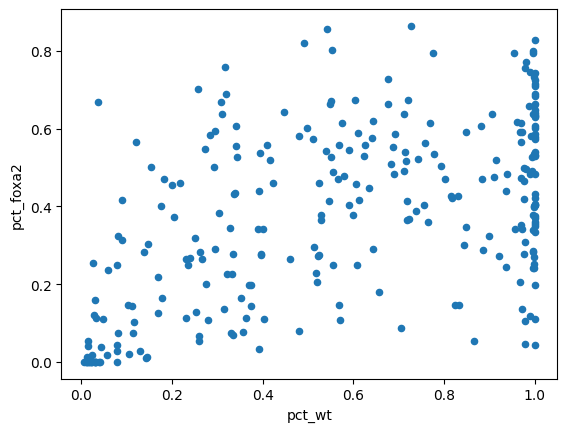

In [137]:
df.plot(kind='scatter', x = 'pct_wt', y =  'pct_foxa2')

In [138]:
outDir 

'../images_data/test_C5_onlyMask'

In [139]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds.csv"), index=True, header=True)

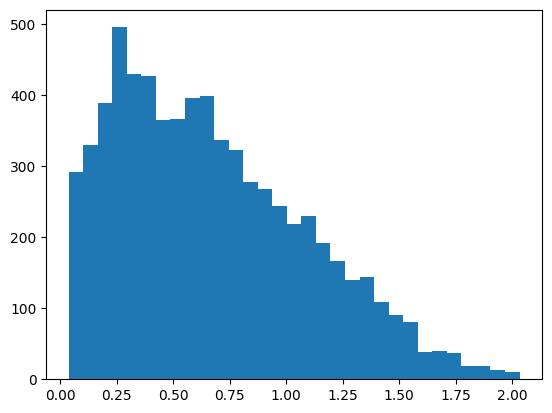

In [58]:
plt.hist(foxa2_wt, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

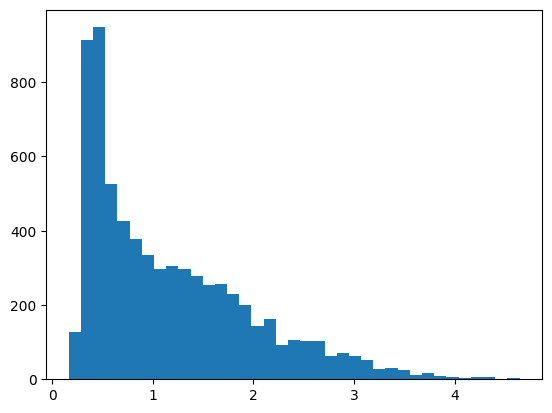

In [59]:
plt.hist(pax6_wt, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

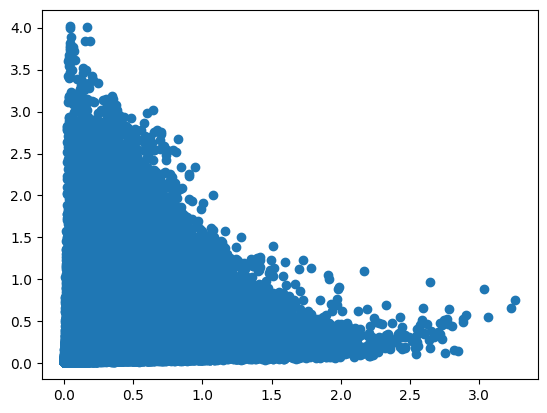

In [28]:
plt.scatter(genotype_wt, genotype_ko) 
# To show the plot
plt.show()

In [40]:
#genotype_wt
genotype_all = np.concatenate((genotype_wt, genotype_ko), axis=0)
print(genotype_all.size)
sels = np.where(genotype_all>0)
genotype_sels = genotype_all[sels]
print(genotype_sels.size)
genotype_sels

121968
121968


array([0.07006531, 0.06854353, 0.06296367, ..., 0.03537736, 0.04874214,
       0.06053459])

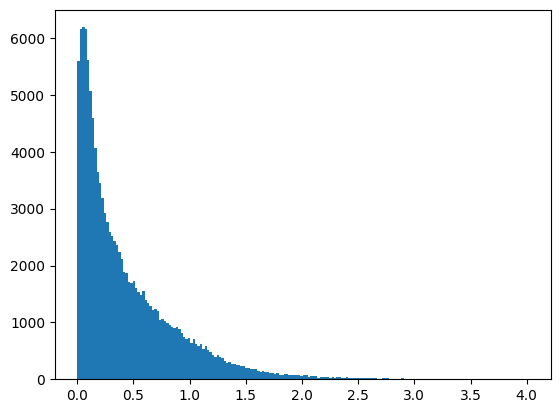

In [41]:
plt.hist(genotype_sels, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

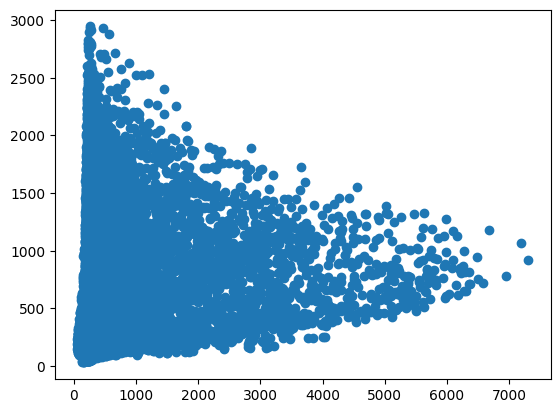

In [101]:
plt.scatter(foxa2_wt, pax6_wt) 
# To show the plot
plt.show()

In [ ]:
############################################################
###
### FoxA2 KO 
### counting the voxels based on the masked and cyst-level background 
###
############################################################

In [63]:
CPoutDir = "../images_data/test_FoxA2KO_C5"

In [64]:
ImageDir = "../images_data/d4_10x_FoxA2KO_WTchim"
outDir = "../images_data/test_FoxA2KO_onlyMask"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [65]:
fileName = '241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_63_01_isotropic'

In [66]:
mask = imread(os.path.join(CPoutDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
#C1 = imread(os.path.join(CPoutDir, str(fileName + "_FoxA2mask.tiff"))) # FoxA2, nuclei
#C2 = imread(os.path.join(CPoutDir, str(fileName + "_P6KOSCmask.tiff"))) # Pax6-KO genotype Scarlet, nuclei
#C3 = imread(os.path.join(CPoutDir, str(fileName + "_WTGFPmask.tiff"))) # WT genotype GFP, whole cell 
#C4 = imread(os.path.join(CPoutDir, str(fileName + "_Pax6mask.tiff"))) # Pax6, nuclei
C1 = imread(os.path.join(ImageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(ImageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(ImageDir, str(fileName + "_C3.tif"))) # WT genotype GFP, whole cell 
C4 = imread(os.path.join(ImageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei

In [67]:
C1 = C1 / np.quantile(C1, 0.99)
C2 = C2 / np.quantile(C2, 0.99)
C3 = C3 / np.quantile(C3, 0.99)
C4 = C4 / np.quantile(C4, 0.99)

In [68]:
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank

labels_mask, nb_cyst = measure.label(mask, return_num = True)

In [69]:
nb_cyst

35

In [70]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank

from skimage import measure
data = {"image": [], "cyst_index": [], "cyst_size": [],  "pct_genotype": [], "pct_wt": [], "pct_foxa2": [], "pct_pax6": [],  
        "cutoff_wt": [],  "cutoff_ko": [],  "cutoff_foxa2": [],  "cutoff_pax6": []}
df = pd.DataFrame(data)
df

Empty DataFrame
Columns: [image, cyst_index, cyst_size, pct_genotype, pct_wt, pct_foxa2, pct_pax6, cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6]
Index: []

In [71]:
#CPoutDir = "../images_data/CPouts2"
for nm in os.listdir(CPoutDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(CPoutDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(ImageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(ImageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(ImageDir, str(fileName + "_C3.tif"))) # WT genotype GFP, whole cell 
        C4 = imread(os.path.join(ImageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.99)
        C2 = C2 / np.quantile(C2, 0.99)
        C3 = C3 / np.quantile(C3, 0.99)
        C4 = C4 / np.quantile(C4, 0.99)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
       
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                #print(cyst_index[0].size)
                genotype_wt = C3[cyst_index]
                genotype_ko = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
                
                cutoff_wt = threshold_otsu(genotype_wt)
                cutoff_ko = threshold_otsu(genotype_ko)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                #print(cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6)
                
                sels = np.where((genotype_wt > cutoff_wt) | (genotype_ko > cutoff_ko))
                genotype_wt_sels = genotype_wt[sels]
                genotype_ko_sels = genotype_ko[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]

                index_wt = np.where(genotype_wt_sels > genotype_ko_sels)
                #print(index_wt[0].size/sels[0].size)
                
                
                #nb_wt += [geno_wt[0].size]
                #pax6_wt = pax6[geno_wt]
                #foxa2_wt = foxa2[geno_wt]
                #index_foxa2 = np.where(foxa2_wt > 0)
                #index_pax6 = np.where(pax6_wt > 0)
                
                #nb_wt_foxa2 += [index_foxa2[0].size]
                #nb_wt_pax6 += [index_pax6[0].size]
                
                #nb_ko += [geno_ko[0].size]
                #pax6_ko = pax6[geno_ko]
                #foxa2_ko = foxa2[geno_ko]
                #index_foxa2_ko = np.where(foxa2_ko > 0)
                #index_pax6_ko = np.where(pax6_ko > 0)
                
                #nb_ko_foxa2 += [index_foxa2_ko[0].size]
                #nb_ko_pax6 += [index_pax6_ko[0].size]
                
                
                if index_wt[0].size > 0:
                    foxa2_wt = foxa2_sels[index_wt]
                    pax6_wt = pax6_sels[index_wt]

                    index_foxa2 = np.where((foxa2_wt > cutoff_foxa2) & (pax6_wt < cutoff_pax6))
                    index_pax6 = np.where((foxa2_wt < cutoff_foxa2) & (pax6_wt > cutoff_pax6))
                    #print(index_foxa2[0].size/(index_foxa2[0].size + index_pax6[0].size))

                    #pax6_wt = pax6[geno_wt]
                    #foxa2_wt = foxa2[geno_wt]
                    #index_foxa2 = np.where(foxa2_wt > 0)
                    #index_pax6 = np.where(pax6_wt > 0)
                    
                    if (index_foxa2[0].size + index_pax6[0].size) > 50:
                        df.loc[len(df)] = [fileName, i,  
                                           cyst_index[0].size, 
                                            (genotype_wt_sels[0].size + genotype_ko_sels[0].size)/cyst_index[0].size, 
                                            index_wt[0].size/sels[0].size, 
                                            index_foxa2[0].size/(index_foxa2[0].size + index_pax6[0].size), 
                                            index_pax6[0].size/(index_foxa2[0].size + index_pax6[0].size),
                                            cutoff_wt, cutoff_ko, cutoff_foxa2, cutoff_pax6
                                          ]

241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_69_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E8_67_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E8_66_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E8_65_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_63_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_62_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_70_01_isotropic
241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01_isotropic


In [72]:
df

image  cyst_index  cyst_size  \
0    241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01...           1      39740   
1    241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01...           2      37536   
2    241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01...           3      80200   
3    241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01...           4      80692   
4    241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E7_61_01...           5      19452   
..                                                 ...         ...        ...   
220  241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01...          21      21428   
221  241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01...          22      18708   
222  241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01...          27      12612   
223  241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01...          28      24680   
224  241023_10x_d4-2umZ_3-FS-WG_RA_FA2-Px6_E9_71_01...          30      16364   

     pct_genotype    pct_wt  pct_foxa2  pct_pax6  cutoff_wt  cutoff_ko  \
0        0.000050  0.990528   0.240027  0.759973   1.457598   0.018118   
1        0.000053  0.580925   0.525677  0.474323   1.032752   0.336111   
2        0.000025  0.200845   0.189089  0.810911   0.629629   1.374887   
3        0.000025  0.477443   0.110728  0.889272   1.023827   0.464121   
4        0.000103  0.987125   0.061712  0.938288   1.654578   0.089382   
..            ...       ...        ...       ...        ...        ...   
220      0.000093  0.014620   1.000000  0.000000   0.206227   0.572720   
221      0.000107  0.089101   0.609467  0.390533   0.235576   0.705946   
222      0.000159  0.951789   0.505185  0.494815   1.099178   0.095968   
223      0.000081  0.607704   0.338698  0.661302   0.703399   0.564611   
224      0.000122  0.050409   1.000000  0.000000   0.044602   0.536058   

     cutoff_foxa2  cutoff_pax6  
0        1.984420     0.579827  
1        2.302191     0.698204  
2        1.314823     0.823305  
3        2.268567     0.735475  
4        0.882848     0.573748  
..            ...          ...  
220      0.260720     0.595527  
221      0.719844     0.409891  
222      1.839108     0.445039  
223      1.702827     0.460515  
224      0.190181     0.300264  

[225 rows x 11 columns]

<Axes: xlabel='pct_wt', ylabel='pct_foxa2'>

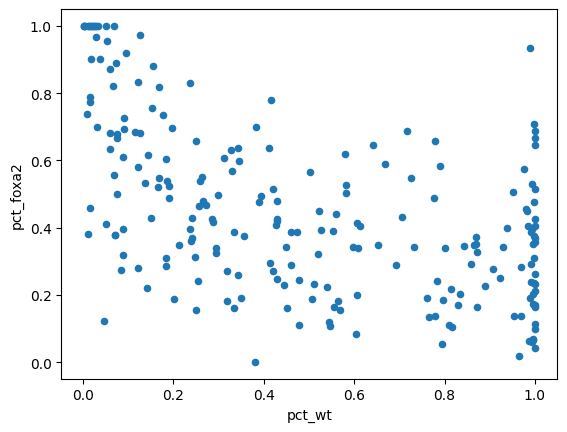

In [73]:
df.plot(kind='scatter', x = 'pct_wt', y =  'pct_foxa2')

In [74]:
outDir 

'../images_data/test_FoxA2KO_onlyMask'

In [75]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds.csv"), index=True, header=True)

In [ ]:
#############################################
##
## PAX6 KO with CP binary images by Hannah
#############################################

In [127]:
import pandas as pd
from skimage import measure
data = {"image": [], "cyst_index": [], "cyst_size": [],  "pct_genotype": [], "pct_wt": [], "pct_foxa2": [], "pct_pax6": []}
df = pd.DataFrame(data)
df

Empty DataFrame
Columns: [image, cyst_index, cyst_size, pct_genotype, pct_wt, pct_foxa2, pct_pax6]
Index: []

In [129]:
nb_wt = []
nb_wt_foxa2 = []
nb_wt_pax6 = []

nb_ko = []
nb_ko_foxa2 = []
nb_ko_pax6 = []

In [130]:
CPoutDir = "../images_data/CPouts2"
for nm in os.listdir(CPoutDir):
    if "_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(CPoutDir, str(fileName + "_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(CPoutDir, str(fileName + "_FoxA2mask.tiff"))) # FoxA2, nuclei
        C2 = imread(os.path.join(CPoutDir, str(fileName + "_P6KOSCmask.tiff"))) # Pax6-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(CPoutDir, str(fileName + "_WTGFPmask.tiff"))) # WT genotype GFP, whole cell 
        C4 = imread(os.path.join(CPoutDir, str(fileName + "_Pax6mask.tiff"))) # Pax6, nuclei
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)

        for i in range(nb_cyst+1):
            if i > 0:
                #print(i) # prints: -1, 0, 1, 2, 3, 4,
                cyst_index = np.where(labels_mask == i)
                genotype_wt = C3[cyst_index]
                genotype_ko = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
        
                geno_wt = np.where((genotype_wt > 0) & (genotype_ko == 0)) # for and
                geno_ko = np.where((genotype_wt == 0) & (genotype_ko > 0)) # for and
                
                nb_wt += [geno_wt[0].size]
                pax6_wt = pax6[geno_wt]
                foxa2_wt = foxa2[geno_wt]
                index_foxa2 = np.where(foxa2_wt > 0)
                index_pax6 = np.where(pax6_wt > 0)
                
                nb_wt_foxa2 += [index_foxa2[0].size]
                nb_wt_pax6 += [index_pax6[0].size]
                
                nb_ko += [geno_ko[0].size]
                pax6_ko = pax6[geno_ko]
                foxa2_ko = foxa2[geno_ko]
                index_foxa2_ko = np.where(foxa2_ko > 0)
                index_pax6_ko = np.where(pax6_ko > 0)
                
                nb_ko_foxa2 += [index_foxa2_ko[0].size]
                nb_ko_pax6 += [index_pax6_ko[0].size]
                
                
                if geno_wt[0].size > 0:
                    pax6_wt = pax6[geno_wt]
                    foxa2_wt = foxa2[geno_wt]
                    index_foxa2 = np.where(foxa2_wt > 0)
                    index_pax6 = np.where(pax6_wt > 0)
                    
                    df.loc[len(df)] = [fileName, i,  cyst_index[0].size, 
                                       (geno_ko[0].size + geno_wt[0].size)/cyst_index[0].size, 
                                        geno_wt[0].size/(geno_ko[0].size + geno_wt[0].size), 
                                        index_foxa2[0].size/geno_wt[0].size, 
                                        index_pax6[0].size/geno_wt[0].size]

241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_86_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_87_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_89_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_90_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F8_91_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_93_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_94_01_isotropic_C5
241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01_isotropic_C5


In [131]:
print(np.sum(nb_wt))
print(np.sum(nb_ko))
print(np.sum(nb_wt_foxa2)/np.sum(nb_wt))
print(np.sum(nb_wt_pax6)/np.sum(nb_wt))

print(np.sum(nb_ko_foxa2)/np.sum(nb_ko))
print(np.sum(nb_ko_pax6)/np.sum(nb_ko))


2878203
4250792
0.33603814602375165
0.4960226919366007
0.571094986534274
0.027127415314604903


In [132]:
df 

image  cyst_index  cyst_size  \
0    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           1      58628   
1    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           2      30408   
2    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           3      60392   
3    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           4      52778   
4    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           5      40924   
..                                                 ...         ...        ...   
281  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          56      44664   
282  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          58        516   
283  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          59       6968   
284  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          60      26028   
285  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          64       5760   

     pct_genotype    pct_wt  pct_foxa2  pct_pax6  
0        0.485365  0.332338   0.498995  0.450248  
1        0.499474  0.138662   0.701330  0.001425  
2        0.496788  0.700287   0.386816  0.549691  
3        0.608492  0.995983   0.290721  0.734759  
4        0.286531  0.533515   0.397219  0.453325  
..            ...       ...        ...       ...  
281      0.519210  0.028374   0.364742  0.346505  
282      0.934109  1.000000   0.000000  0.197095  
283      0.565442  0.999746   0.743336  0.233054  
284      0.510719  0.884225   0.225370  0.482729  
285      0.595833  1.000000   0.081294  0.086538  

[286 rows x 7 columns]

In [133]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6.csv"), index=True, header=True)

In [17]:
outDir
df = pd.read_csv(os.path.join(outDir, "genotype_FoxA2_Pax6.csv"), index_col = 0) 

In [18]:
df

image  cyst_index  \
0    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           1   
1    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           2   
2    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           3   
3    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           4   
4    241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F7_85_01...           5   
..                                                 ...         ...   
281  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          56   
282  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          58   
283  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          59   
284  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          60   
285  241023_10x_d4-2umZ_4-PS-WG_RA_FA2-Px6_F9_95_01...          64   

     pct_genotype    pct_wt  pct_foxa2  pct_pax6  
0        0.485365  0.332338   0.498995  0.450248  
1        0.499474  0.138662   0.701330  0.001425  
2        0.496788  0.700287   0.386816  0.549691  
3        0.608492  0.995983   0.290721  0.734759  
4        0.286531  0.533515   0.397219  0.453325  
..            ...       ...        ...       ...  
281      0.519210  0.028374   0.364742  0.346505  
282      0.934109  1.000000   0.000000  0.197095  
283      0.565442  0.999746   0.743336  0.233054  
284      0.510719  0.884225   0.225370  0.482729  
285      0.595833  1.000000   0.081294  0.086538  

[286 rows x 6 columns]

<Axes: xlabel='cyst_size', ylabel='pct_foxa2'>

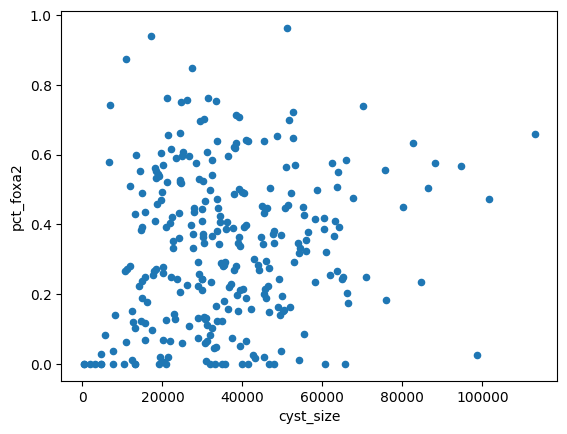

In [135]:
df.plot(kind='scatter', x = 'cyst_size', y =  'pct_foxa2')

<Axes: xlabel='cyst_size', ylabel='pct_pax6'>

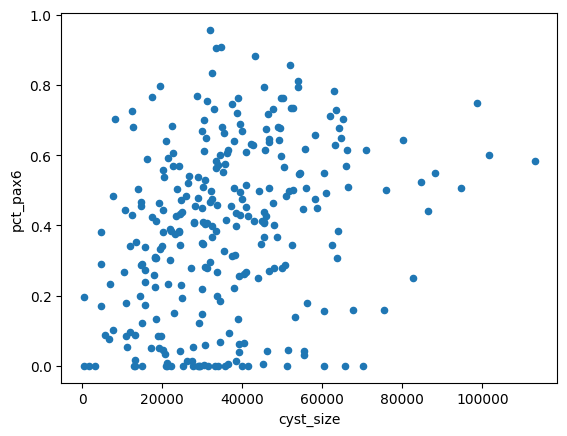

In [136]:
df.plot(kind='scatter', x = 'cyst_size', y =  'pct_pax6')

In [22]:
dff = df[["pct_wt", "pct_foxa2"]]
bins = 10
data_cut = pd.cut(dff.pct_wt,bins)           #we cut the data following the bins
grp = dff.groupby(by = data_cut)        #we group the data by the cut

ret = grp.aggregate(np.median)         #we produce an aggregate representation (median) of each bin
ret

/tmp/ipykernel_67286/2153116893.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = dff.groupby(by = data_cut)        #we group the data by the cut
/tmp/ipykernel_67286/2153116893.py:6: FutureWarning: The provided callable <function median at 0x2aeaa281a790> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ret = grp.aggregate(np.median)         #we produce an aggregate representation (median) of each bin


pct_wt  pct_foxa2
pct_wt                               
(-0.000908, 0.1]  0.011182   0.316096
(0.1, 0.2]        0.138052   0.372969
(0.2, 0.3]        0.250484   0.369866
(0.3, 0.4]        0.339594   0.390062
(0.4, 0.5]        0.476663   0.393534
(0.5, 0.6]        0.562820   0.397484
(0.6, 0.7]        0.664430   0.337516
(0.7, 0.8]        0.747142   0.400039
(0.8, 0.9]        0.844303   0.499484
(0.9, 1.0]        1.000000   0.254315

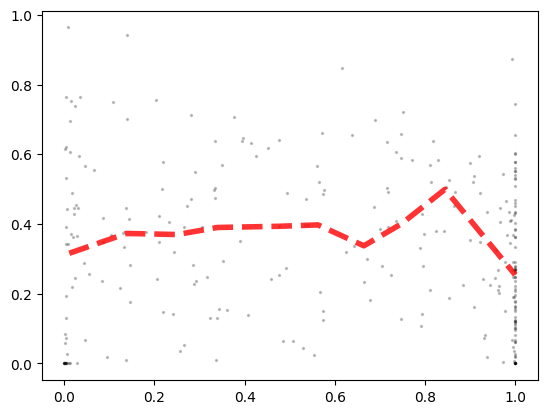

In [23]:
 #plotting
 plt.scatter(dff.pct_wt,dff.pct_foxa2,color='k',alpha=.2,s=2)
 plt.plot(ret.pct_wt,ret.pct_foxa2,'r--',lw=4,alpha=.8)
 plt.show()

In [ ]:
bins = np.linspace(X.min(),X.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X,bins)
running_median = [np.median(Y[idx==k]) for k in range(total_bins)]

ZeroDivisionError: division by zero

In [23]:
cyst_index

(array([ 5,  5,  5, ..., 62, 62, 62]),
 array([341, 341, 341, ..., 358, 358, 358]),
 array([200, 201, 202, ..., 199, 200, 201]))

In [25]:
genotype_wt

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [120]:
geno_wt = np.where((genotype_wt > 0) & (genotype_ko == 0)) # for and
geno_ko = np.where((genotype_wt == 0) & (genotype_ko > 0)) # for and
#np.where((condition 1) | (condition 2)) # for or



In [121]:
geno_wt[0].size

0

In [122]:
geno_ko[0].size

16123

In [96]:
(geno_ko[0].size + geno_wt[0].size)/cyst_index[0].size
geno_wt[0].size/(geno_ko[0].size + geno_wt[0].size)

0.6238930928996941

In [97]:
pax6_wt = pax6[geno_wt]
foxa2_wt = foxa2[geno_wt]

In [102]:
#plt.hist(genotype_wt, bins=100, color='skyblue', edgecolor='black')
index_foxa2 = np.where(foxa2_wt > 0)
index_foxa2[0].size/geno_wt[0].size

0.3207741935483871

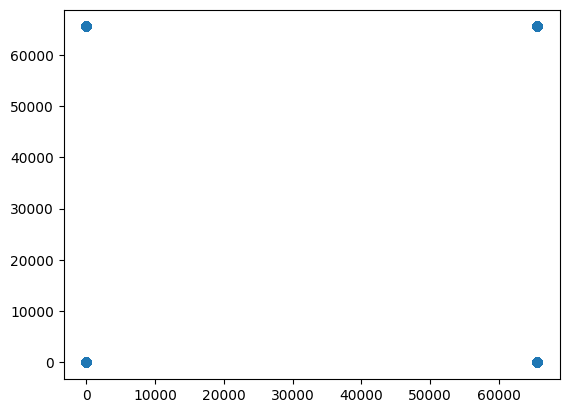

In [26]:
plt.scatter(genotype_wt, foxa2)
 
# To show the plot
plt.show()

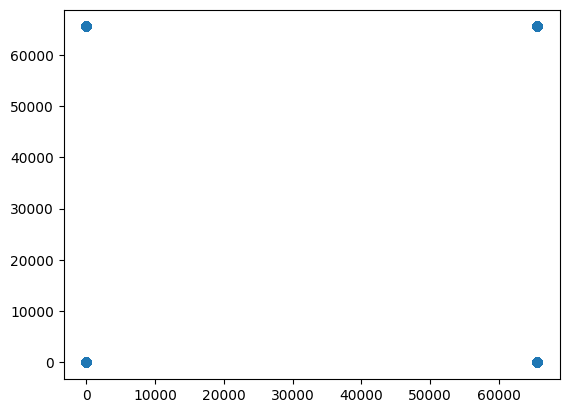

In [28]:
plt.scatter(genotype_wt, genotype_ko)
# To show the plot
plt.show()

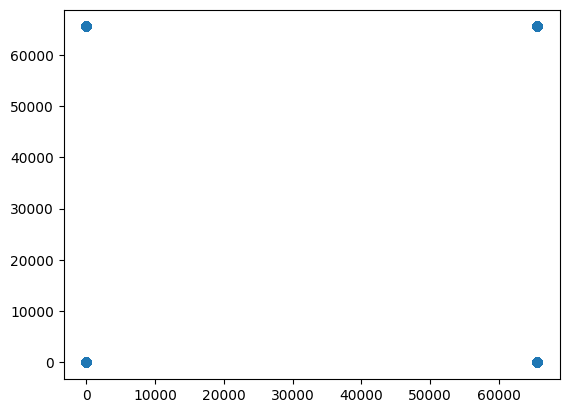

In [31]:
plt.scatter(genotype_ko, pax6)
 
# To show the plot
plt.show()


0.3432126071329831

In [42]:
genotype_ko.size

60984

In [43]:
pax6.size

60984

In [26]:
#plt.hist(genotype_wt, bins=100, color='skyblue', edgecolor='black')

In [ ]:
# analyse objects
#properties = measure.regionprops(label_image, intensity_image=image)

In [ ]:
################################
## RA control samples to check the FoxA2/Pax6 ratios
################################

In [23]:
imageDir = "../images_data/d4_WT"

In [24]:
outDir = "../images_data/results/test_WT_pct_FoxA2"
if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [25]:
fileName = '20220726_d4_10x_RA-18h_E2_121_1745_isotropic'

In [33]:
mask = imread(os.path.join(CPoutDir, str(fileName + "_C4_CystMask.tiff"))) # mask segmeted cysts
C3 = imread(os.path.join(WTDir, str(fileName + "_C3.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(WTDir, str(fileName + "_C2.tif"))) # Pax6, nuclei

C3 = C3 / np.quantile(C3, 0.99)
C2 = C2 / np.quantile(C2, 0.99)

In [34]:
#projection_z = cle.maximum_z_projection(mask)
#cle.imshow(projection_z, labels=True)

In [35]:
from skimage import measure
import pandas as pd
from skimage.filters import threshold_otsu, rank

labels_mask, nb_cyst = measure.label(mask, return_num = True)

In [36]:
nb_cyst

27

In [37]:
cyst_index = np.where(labels_mask == 1)
cyst_index[0].size
#genotype_wt = C3[cyst_index]
#genotype_ko = C2[cyst_index]

20156

In [38]:
foxa2 = C3[cyst_index]
pax6 = C2[cyst_index]

cutoff_foxa2 = threshold_otsu(foxa2)
cutoff_pax6 = threshold_otsu(pax6)
print(cutoff_foxa2, cutoff_pax6)


1.0831849261647255 1.2664480050148086


In [39]:
xx = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
print(xx[0].size)

yy = np.where((foxa2 < cutoff_foxa2 ) & (pax6 > cutoff_pax6))
print(yy[0].size)

zz = np.where((foxa2 > cutoff_foxa2 ) & (pax6 > cutoff_pax6))
print(zz[0].size)

print(xx[0].size/(xx[0].size + yy[0].size + zz[0].size))

1834
8172
758
0.17038275733927907


In [40]:
import pandas as pd
from skimage import measure
from skimage.filters import threshold_otsu, rank

data = {"image": [], "cyst_index": [], "cyst_size": [],  "total": [],  "pct_foxa2": [], "pct_pax6": [],  "pct_both": []}
df = pd.DataFrame(data)
df

Empty DataFrame
Columns: [image, cyst_index, cyst_size, total, pct_foxa2, pct_pax6, pct_both]
Index: []

In [42]:
CPoutDir = "../images_data/CPattemptDec24/wt"
for nm in os.listdir(CPoutDir):
    if "_C2_Pax6mask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C2_Pax6mask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(CPoutDir, str(fileName + "_C4_CystMask.tiff"))) # mask segmeted cysts
        C3 = imread(os.path.join(WTDir, str(fileName + "_C3.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(WTDir, str(fileName + "_C2.tif"))) # Pax6, nuclei

        C3 = C3 / np.quantile(C3, 0.99)
        C2 = C2 / np.quantile(C2, 0.99)

        #mask = imread(os.path.join(CPoutDir, str(fileName + "_C4_CystMask.tiff"))) # mask segmeted cysts
        #C1 = imread(os.path.join(CPoutDir, str(fileName + "_C3_FoxA2mask.tiff"))) # FoxA2, nuclei
        #C2 = imread(os.path.join(CPoutDir, str(fileName + "_C2_Pax6mask.tiff"))) # Pax6, nuclei
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)

        for i in range(nb_cyst+1):
            if i > 0:
                #print(i) # prints: -1, 0, 1, 2, 3, 4,
                cyst_index = np.where(labels_mask == i)
                
                foxa2 = C3[cyst_index]
                pax6 = C2[cyst_index]
                
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)

                xx = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
                yy = np.where((foxa2 < cutoff_foxa2 ) & (pax6 > cutoff_pax6))
                zz = np.where((foxa2 > cutoff_foxa2 ) & (pax6 > cutoff_pax6))      
                total = (xx[0].size + yy[0].size + zz[0].size)
                
                if total > 0:                    
                    df.loc[len(df)] = [ fileName, i, 
                                        cyst_index[0].size, 
                                        total,
                                        xx[0].size / total,
                                        yy[0].size / total,
                                        zz[0].size / total ]

20220726_d4_10x_RA-18h_E2_121_1745_isotropic
20220726_d4_10x_RA-18h_E2_122_1746_isotropic
20220726_d4_10x_RA-18h_E2_123_1747_isotropic
20220726_d4_10x_RA-18h_E2_124_1748_isotropic
20220726_d4_10x_RA-18h_F2_161_1785_isotropic
20220726_d4_10x_RA-18h_F2_162_1786_isotropic
20220726_d4_10x_RA-18h_F2_163_1787_isotropic
20220726_d4_10x_RA-18h_F2_164_1788_isotropic
20220726_d4_10x_RA-18h_G2_201_1825_isotropic
20220726_d4_10x_RA-18h_G2_202_1826_isotropic
20220726_d4_10x_RA-18h_G2_203_1827_isotropic
20220726_d4_10x_RA-18h_G2_204_1828_isotropic


In [43]:
outDir 

'../images_data/test_WT_onlyMask'

In [44]:
outDir
df.to_csv(os.path.join(outDir, "wt_FoxA2_Pax6.csv"), index=True, header=True)


In [55]:
df = pd.read_csv(os.path.join(outDir, "wt_FoxA2_Pax6.csv"), index_col = 0)

In [56]:
df

image  cyst_index  cyst_size  \
0    20220726_d4_10x_RA-18h_E2_121_1745_isotropic           1      20156   
1    20220726_d4_10x_RA-18h_E2_121_1745_isotropic           2      40508   
2    20220726_d4_10x_RA-18h_E2_121_1745_isotropic           3       4568   
3    20220726_d4_10x_RA-18h_E2_121_1745_isotropic           4       1368   
4    20220726_d4_10x_RA-18h_E2_121_1745_isotropic           5      41908   
..                                            ...         ...        ...   
356  20220726_d4_10x_RA-18h_G2_204_1828_isotropic          46       7012   
357  20220726_d4_10x_RA-18h_G2_204_1828_isotropic          47       7872   
358  20220726_d4_10x_RA-18h_G2_204_1828_isotropic          48         12   
359  20220726_d4_10x_RA-18h_G2_204_1828_isotropic          49        480   
360  20220726_d4_10x_RA-18h_G2_204_1828_isotropic          50        296   

     total  pct_foxa2  pct_pax6  pct_both  
0    10764   0.170383  0.759197  0.070420  
1    22890   0.143862  0.091394  0.764744  
2     1810   0.032044  0.865193  0.102762  
3      726   0.695592  0.066116  0.238292  
4    21519   0.330127  0.429434  0.240439  
..     ...        ...       ...       ...  
356   3366   0.519905  0.216875  0.263220  
357   3629   0.456600  0.217691  0.325710  
358      7   0.142857  0.000000  0.857143  
359    341   0.178886  0.129032  0.692082  
360     75   0.586667  0.173333  0.240000  

[361 rows x 7 columns]

<Axes: xlabel='total', ylabel='pct_foxa2'>

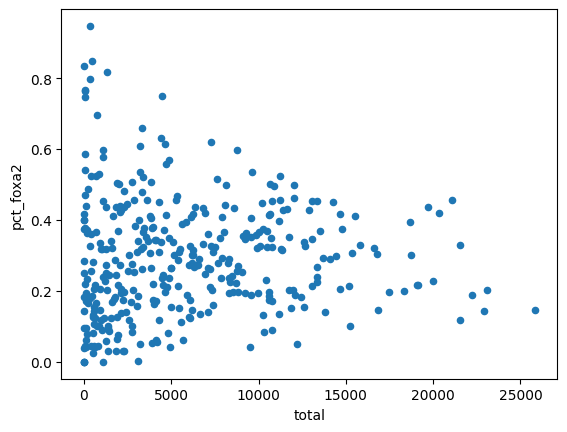

In [57]:
df.plot(kind='scatter', x = 'total', y =  'pct_foxa2')

<Axes: xlabel='cyst_size', ylabel='pct_foxa2'>

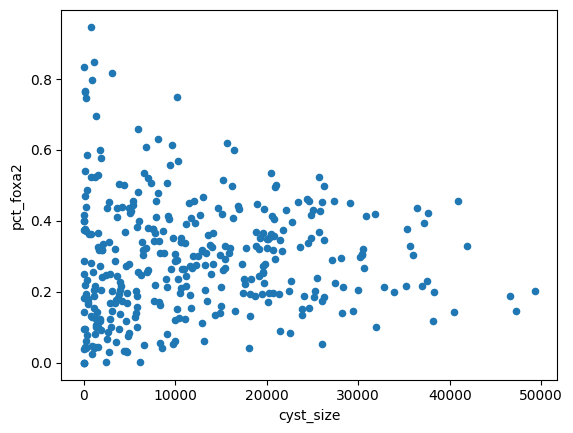

In [58]:
df.plot(kind='scatter', x = 'cyst_size', y =  'pct_foxa2')

<Axes: xlabel='cyst_size', ylabel='pct_foxa2'>

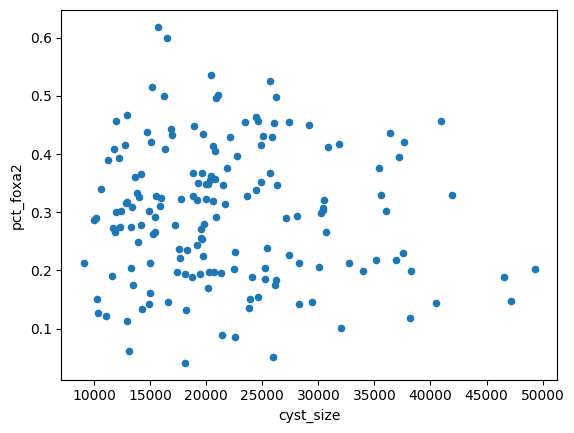

In [59]:
sel = np.where(df[["total"]] > 5000)
df = df.iloc[sel[0], ]
df.plot(kind='scatter', x = 'cyst_size', y =  'pct_foxa2')

In [60]:
np.mean(df[['pct_foxa2']])

0.29742043546049035

In [61]:
np.std(df[['pct_foxa2']])

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


pct_foxa2    0.116949
dtype: float64

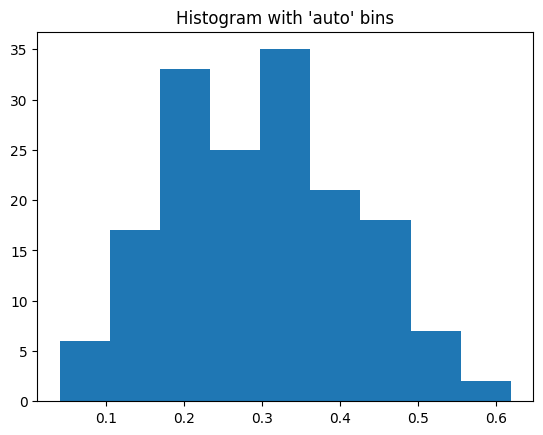

In [62]:
#rng = np.random.RandomState(10)  # deterministic random data
#a = np.hstack((rng.normal(size=1000),
#               rng.normal(loc=5, scale=2, size=1000)))
a = df[['pct_foxa2']]
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [53]:
#df.plot(kind='scatter', x = 'pct_pax6', y =  'pct_foxa2')

In [54]:
#df.plot.hist(by = 'pct_foxa2', alpha=0.5, bins=10)

In [6]:
input_image = imread("../images_data/data/BMP4blastocystC3-cropped_resampled_8bit.tif")

voxel_size_x = 0.202
voxel_size_y = 0.202
voxel_size_z = 1

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


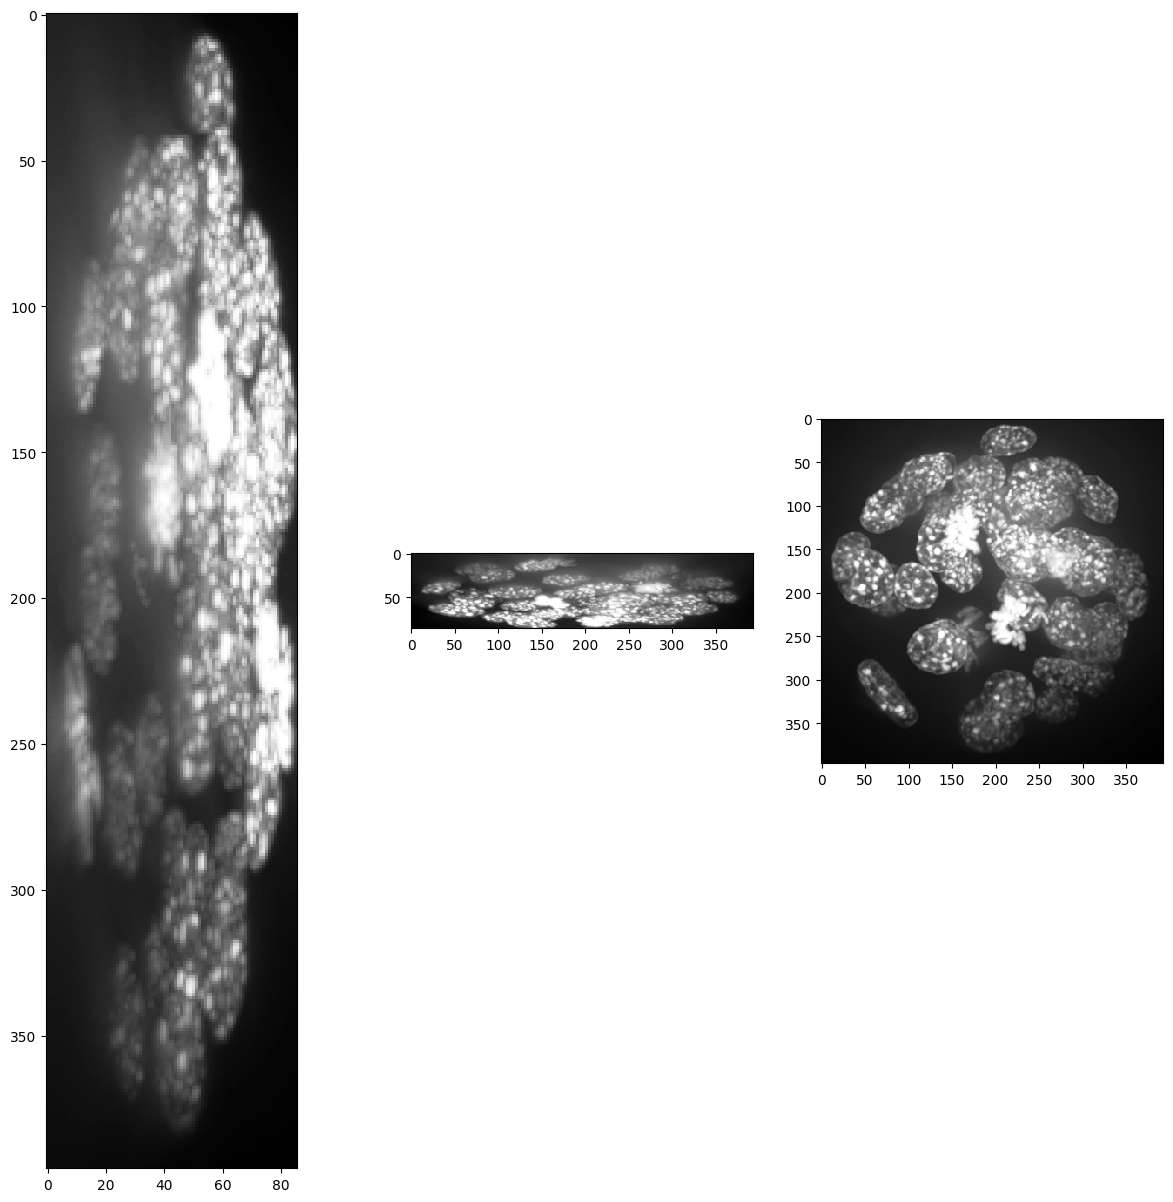

(86, 396, 393)


In [9]:
show(input_image)
print(input_image.shape)

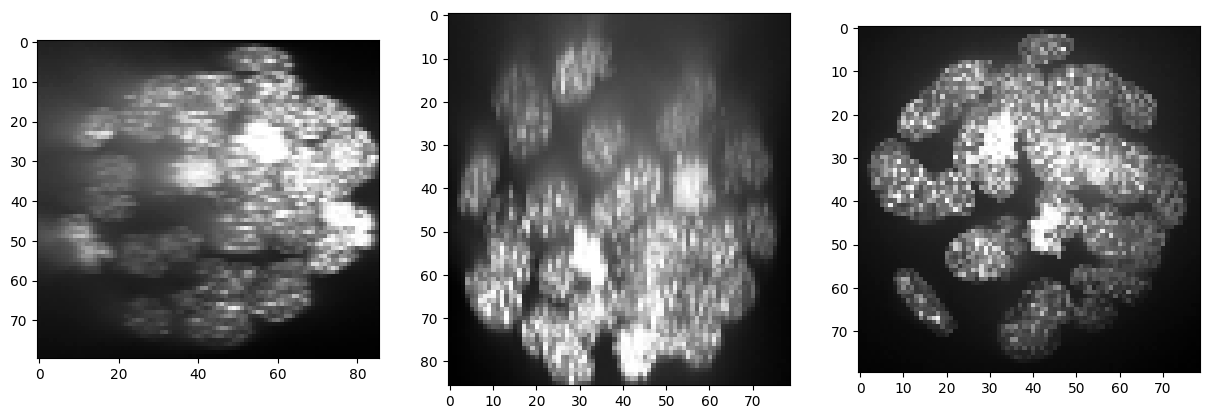

(86, 80, 79)


In [10]:
# Obviously, voxel size is not isotropic. Thus, we scale the image with the voxel size used as scaling factor to get an image stack with isotropic voxels.
resampled = cle.scale(input_image, factor_x=voxel_size_x, factor_y=voxel_size_y, factor_z=voxel_size_z, auto_size=True)

show(resampled)
print(resampled.shape)


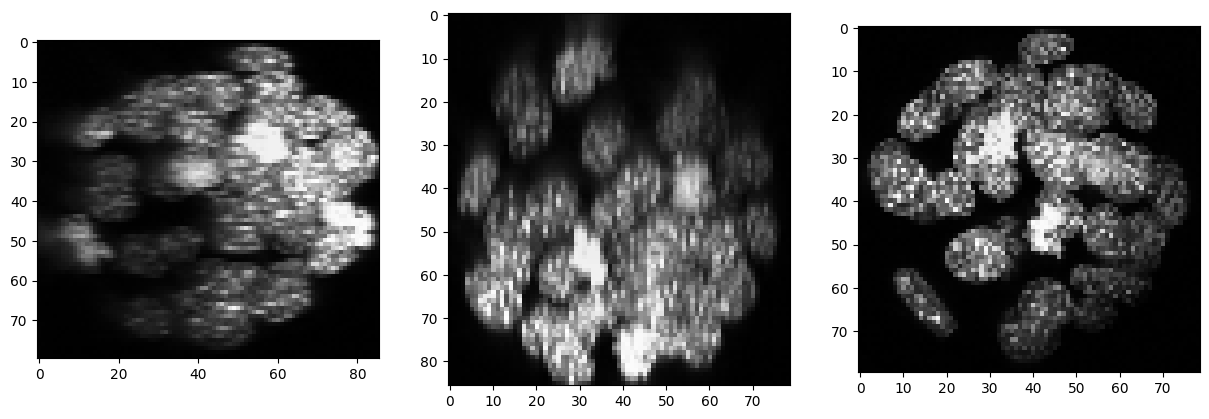

In [11]:
# Furthermore, background intensity appears to increase, potentially a result if more scattering deep in the sample. 
# We can compensate for that by using a background subtraction technique:
backgrund_subtracted = cle.top_hat_box(resampled, radius_x=5, radius_y=5, radius_z=5)
show(backgrund_subtracted)

In [13]:
# Segmentation
segmented = cle.voronoi_otsu_labeling(backgrund_subtracted, spot_sigma=3, outline_sigma=1)

size: 86


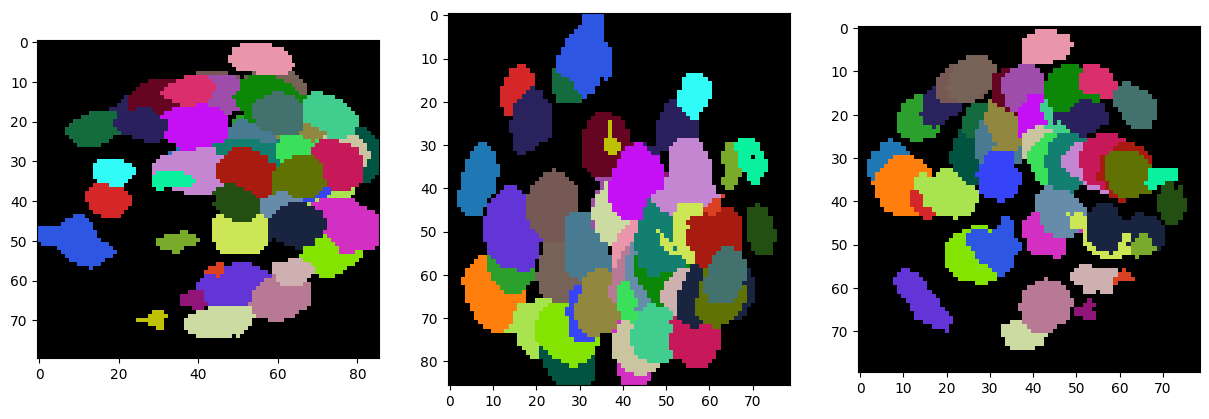

In [14]:
show(segmented, labels=True)

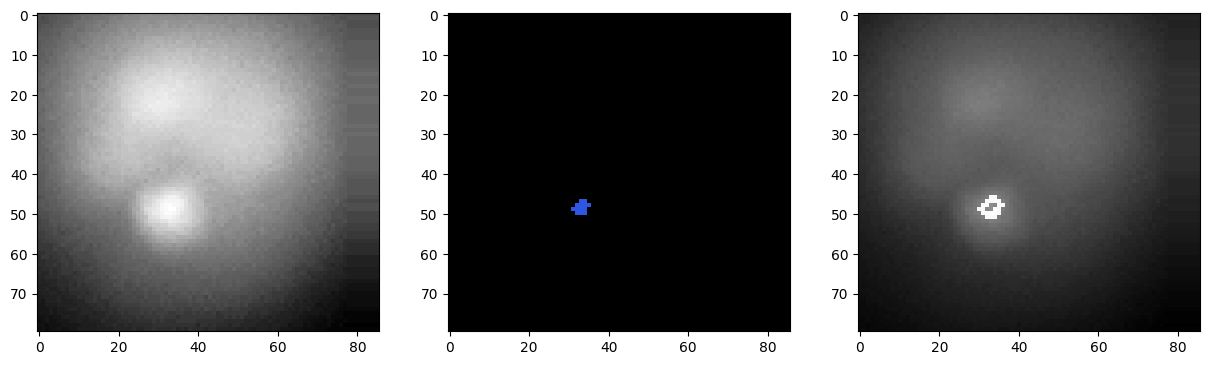

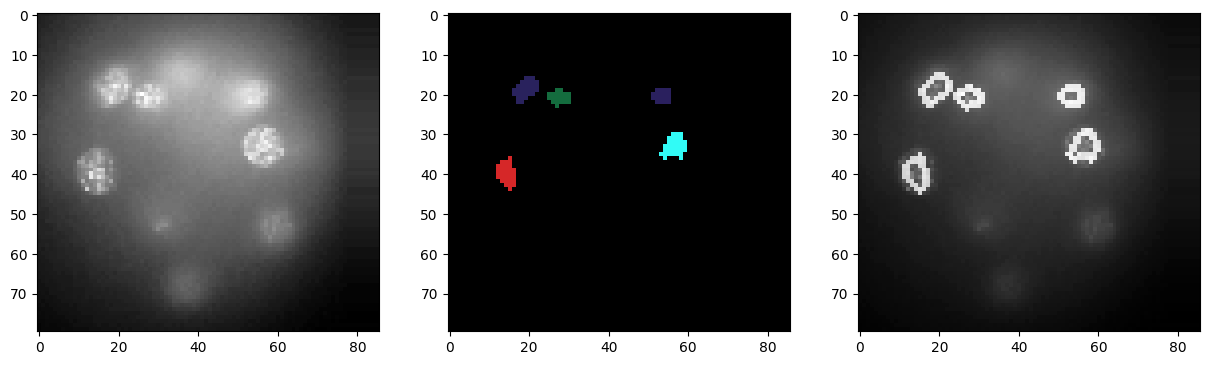

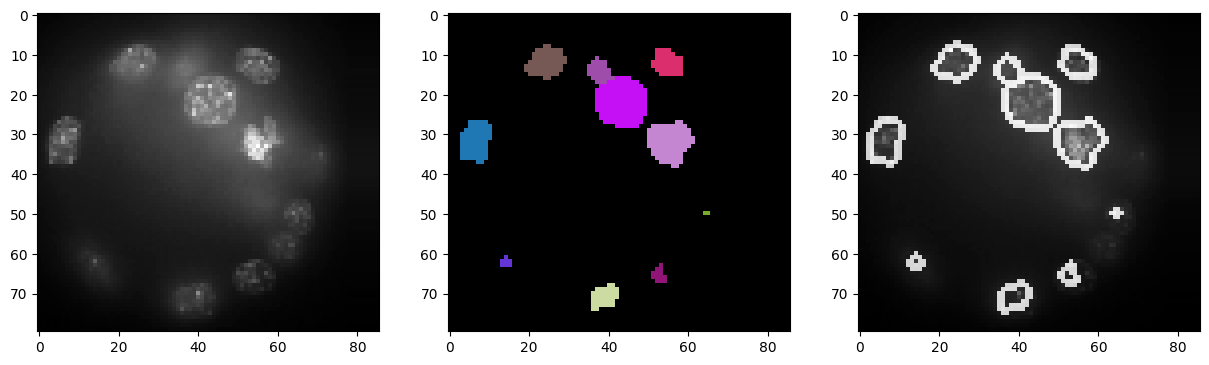

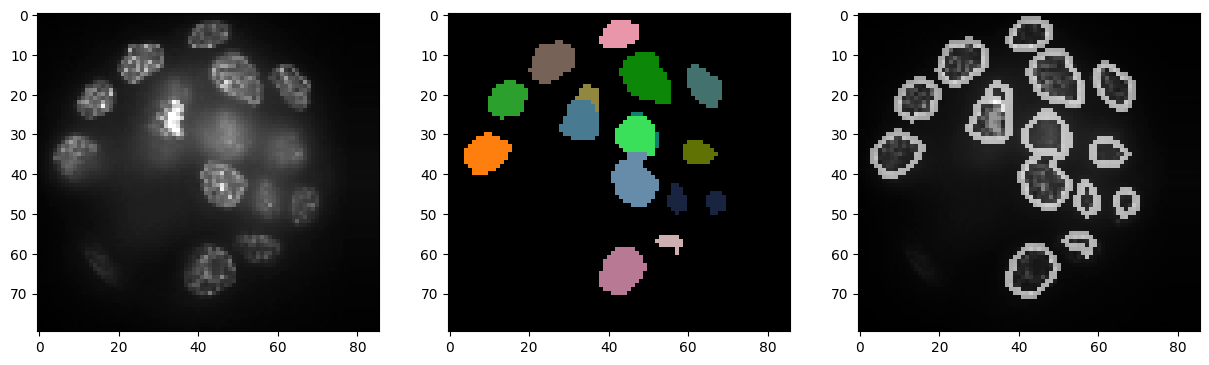

In [15]:
a_slice = cle.create([resampled.shape[1], resampled.shape[0]])
segmented_slice = cle.create([resampled.shape[1], resampled.shape[0]])

for z in range(0, resampled.shape[2], 20):
    label_outlines = None
    combined = None

    # get a single slice from the intensity image and the segmented label image
    cle.copy_slice(resampled, a_slice, z)
    cle.copy_slice(segmented, segmented_slice, z)

    # determine outlines around labeled objects
    label_outlines = cle.detect_label_edges(segmented_slice, label_outlines)

    # combine both images
    outline_intensity_factor = cle.maximum_of_all_pixels(a_slice)
    combined = cle.add_images_weighted(a_slice, label_outlines, combined, 1.0, outline_intensity_factor)

    # visualisation
    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    cle.imshow(a_slice, plot=axs[0])
    cle.imshow(segmented_slice, plot=axs[1], labels=True)
    cle.imshow(combined, plot=axs[2])

In [ ]:
###################
## there is a Qt problem (see also https://github.com/napari/napari/issues/1457)
## napari can't be used for visualization
###################
import napari
from napari.utils import nbscreenshot
QT_DEBUG_PLUGINS=1

# start napari
viewer = napari.Viewer()

# show images
#viewer.add_image(resampled)
#viewer.add_labels(segmented)


In [ ]:
#viewer.dims.current_step = (40, 0, 0)
#nbscreenshot(viewer)
#nbscreenshot(viewer)

In [ ]:
## test 3D image visualization when napari does not work
## https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/10_nd_image_data.html

In [1]:

from skimage.io import imread
from pyclesperanto_prototype import imshow
image_stack = imread('../images_data/data/Haase_MRT_tfl3d1.tif')


/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


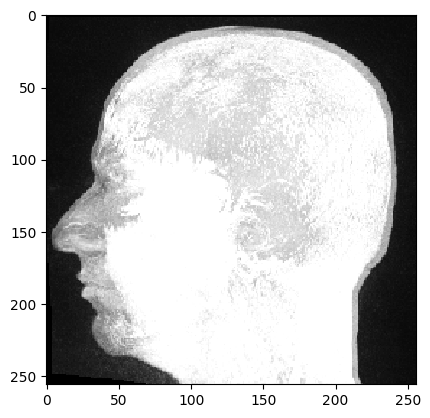

In [2]:
imshow(image_stack)

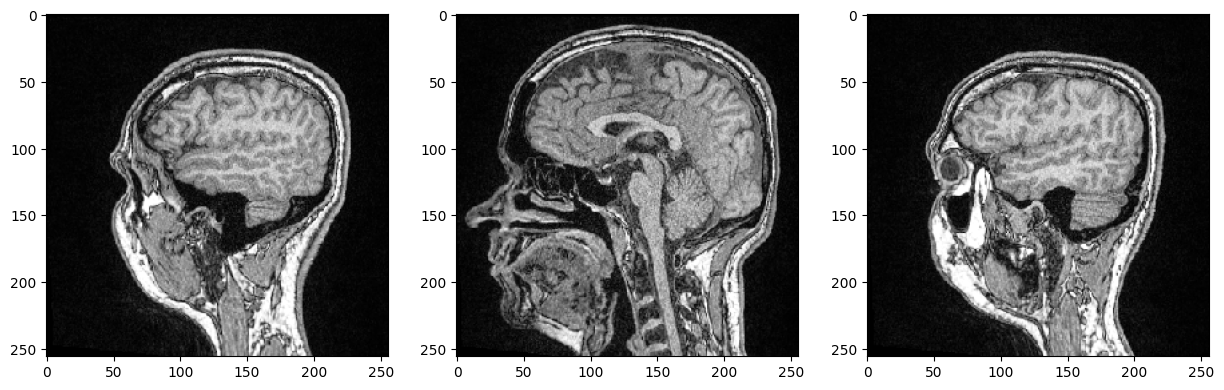

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show three planar images
axs[0].imshow(image_stack[48], cmap='Greys_r')
axs[1].imshow(image_stack[96], cmap='Greys_r')
axs[2].imshow(image_stack[144], cmap='Greys_r');

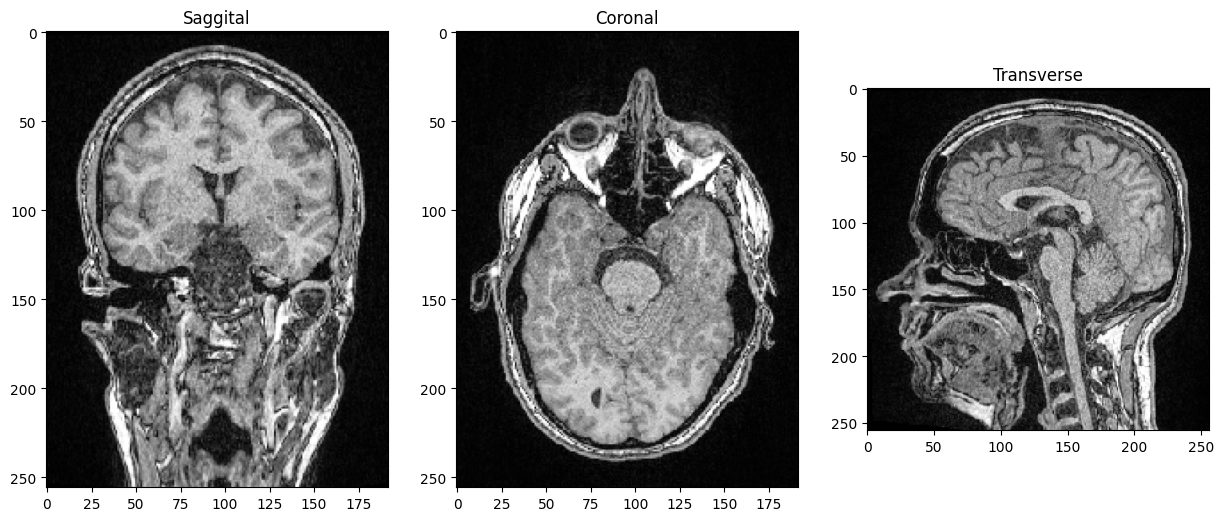

In [4]:
saggital = image_stack[:,:,128].T
coronal = image_stack[:,128,:].T
transverse = image_stack[96]

fig, axs = plt.subplots(1, 3, figsize=(15,15))

# show orthogonal planes
axs[0].imshow(saggital, cmap='Greys_r')
axs[0].set_title('Saggital')

axs[1].imshow(coronal, cmap='Greys_r')
axs[1].set_title('Coronal')

axs[2].imshow(transverse, cmap='Greys_r')
axs[2].set_title('Transverse');

In [5]:
import pyclesperanto_prototype as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [6]:
# Laod example data
input_image = imread('../images_data/data/Haase_MRT_tfl3d1.tif')

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/image_py3.9/lib/python3.9/site-packages/pyclesperanto_prototype/_tier9/_imshow.py:35: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


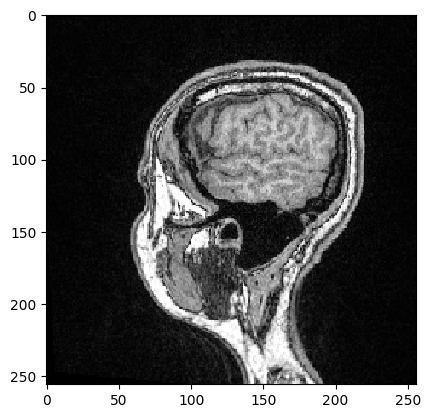

In [7]:
# Copy Slice
image_slice = cle.create([256, 256]);
slice_z_position = 40.0;
cle.copy_slice(input_image, image_slice, slice_z_position)

# show result
cle.imshow(image_slice)

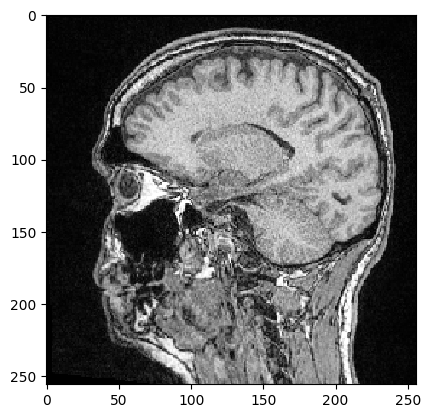

In [8]:
# Alternatively, don't hand over the output image and retrieve it
another_slice = cle.create_2d_xy(input_image)
cle.copy_slice(input_image, another_slice, slice_index = 80)

# show result
cle.imshow(another_slice)

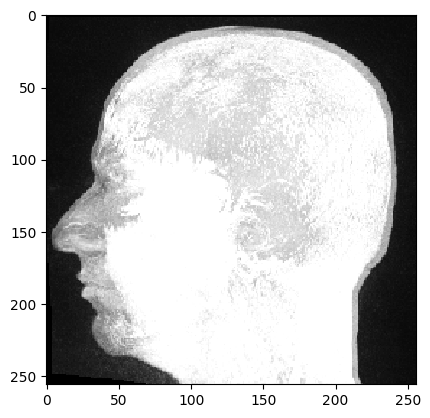

In [9]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
cle.imshow(projection)

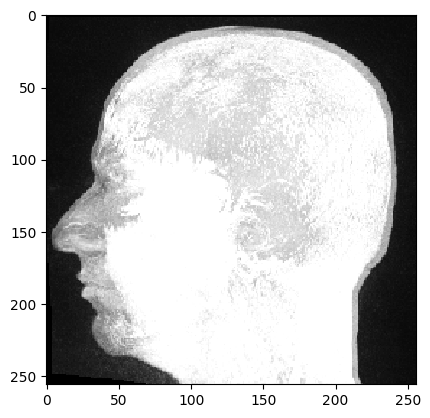

In [10]:
cle.imshow(input_image)

8 warnings generated.


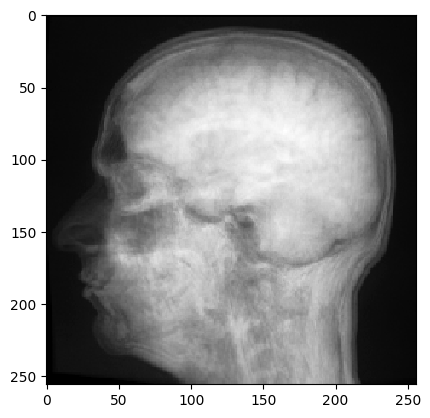

In [11]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
cle.imshow(projection)

8 warnings generated.


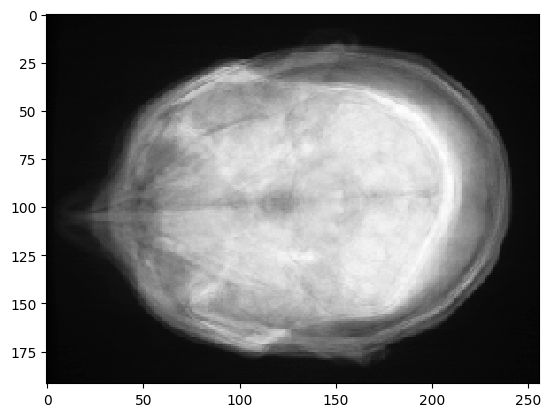

In [12]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
cle.imshow(projection)

8 warnings generated.


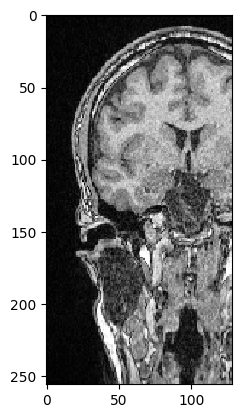

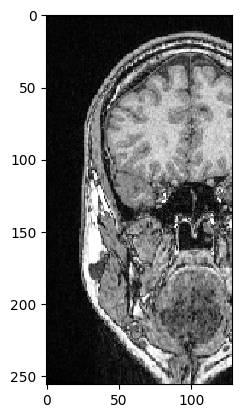

In [13]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image)

# show result
cle.imshow(transposed_image[126])
cle.imshow(transposed_image[98])

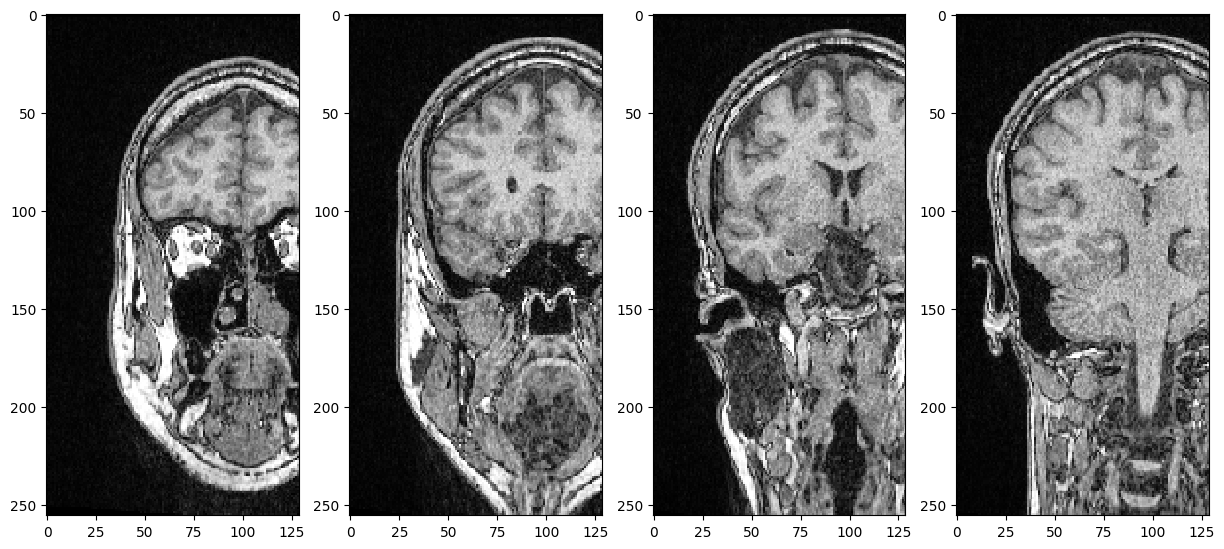

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
cle.imshow(transposed_image[75], plot=axs[0])
cle.imshow(transposed_image[100], plot=axs[1])
cle.imshow(transposed_image[125], plot=axs[2])
cle.imshow(transposed_image[150], plot=axs[3])